<a href="https://colab.research.google.com/github/Vladislavjk/ML-Pet-Projects/blob/main/unsupervised%2Bdeep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = [
	'T-shirt/top',
	'Trouser',
	'Pullover',
	'Dress',
	'Coat',
	'Sandal',
	'Shirt',
	'Sneaker',
	'Bag',
	'Ankle boot']

# Предобработка данных

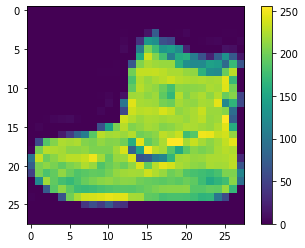

In [4]:
plt.imshow(x_train[0])
plt.colorbar()

In [5]:
# нормализуем данные

In [6]:
x_train = x_train / 255
x_test = x_test / 255

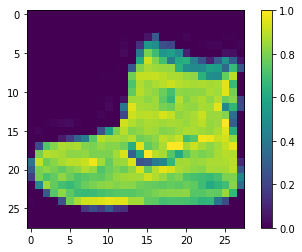

In [7]:
plt.imshow(x_train[0])
plt.colorbar()

In [8]:
# посмотрим на произвольные картинки 

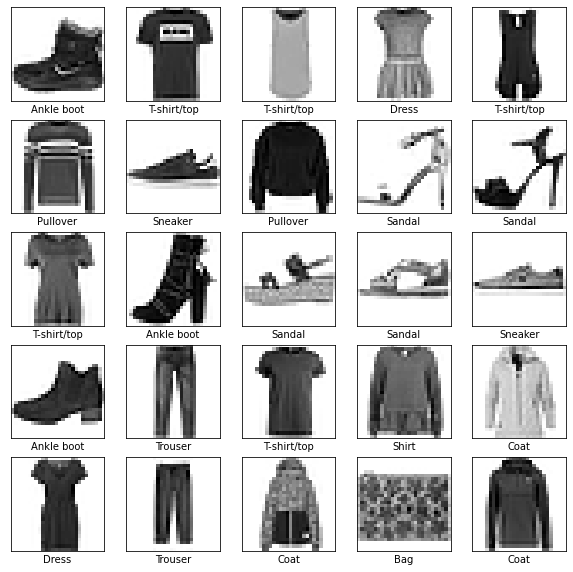

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

# Создание нейронной сети

In [10]:
model = keras.Sequential([
                     keras.layers.Flatten(input_shape=(28,28)),
                     keras.layers.Dense(128, activation='relu'),
                     keras.layers.Dense(10, activation='softmax')
])

In [11]:
# Компиляция модели

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics='accuracy')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Обучение модели

In [15]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5000 - accuracy: 0.8250
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3782 - accuracy: 0.8644
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3380 - accuracy: 0.8767
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3143 - accuracy: 0.8851
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2944 - accuracy: 0.8912
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2818 - accuracy: 0.8961
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2711 - accuracy: 0.8993
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2577 - accuracy: 0.9040
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2492 - accuracy: 0.9076
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.8890


[0.3446943461894989, 0.8889999985694885]

In [17]:
y_pred = [np.argmax(p) for p in model.predict(x_test)]

In [18]:
pd.DataFrame({'y_true' : y_test, 'y_pred' : y_pred}).head(20)

,y_true,y_pred
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
5,1,1
6,4,4
7,6,6
8,5,5
9,7,7


# Кластеризация и понижение размерности

In [19]:
X_train = [c.flatten() for c in x_train]
X_test = [c.flatten() for c in x_test]

In [20]:
# Алгоритм понижения размерности PCA

In [21]:
%%time
pca = PCA(n_components=0.9, random_state=17)
X_pca = pca.fit_transform(X_train)

CPU times: user 23.1 s, sys: 1.44 s, total: 24.6 s
Wall time: 13.3 s


In [22]:
X_pca.shape # то есть нам нужно 84 признака для сохранения 90% дисперсии

(60000, 84)

In [23]:
pca.explained_variance_ratio_

array([0.29039228, 0.1775531 , 0.06019222, 0.04957428, 0.03847655,
       0.03460769, 0.02341691, 0.01905414, 0.01349843, 0.01314267,
       0.00992875, 0.00913255, 0.00765793, 0.00659706, 0.00607851,
       0.00589821, 0.00551934, 0.005245  , 0.00458079, 0.00455515,
       0.00433684, 0.00407097, 0.00384758, 0.00372551, 0.00361107,
       0.00350656, 0.00333241, 0.0031936 , 0.00308063, 0.00293273,
       0.00275603, 0.00265062, 0.00263703, 0.00255835, 0.00246212,
       0.00235901, 0.0023029 , 0.00225522, 0.00218476, 0.00209324,
       0.00200282, 0.0019574 , 0.00194689, 0.00182783, 0.00175354,
       0.00171926, 0.00168792, 0.00163975, 0.00160908, 0.00154846,
       0.00152295, 0.00150044, 0.00146795, 0.00143312, 0.00138277,
       0.00136997, 0.00131154, 0.00128846, 0.00127249, 0.00125851,
       0.00121452, 0.00120198, 0.00118143, 0.00116257, 0.00115583,
       0.00112295, 0.00111075, 0.00109669, 0.00105128, 0.00104659,
       0.001031  , 0.00101051, 0.00097795, 0.00095689, 0.00093

In [24]:
# сколько дисперсии сохраняется в зависимости от числа главных компонент

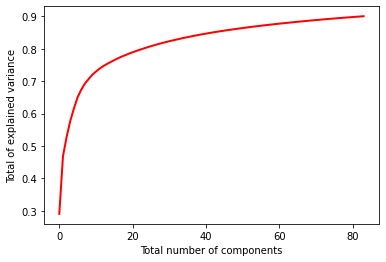

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color='r');
plt.xlabel('Total number of components');
plt.ylabel('Total of explained variance');

In [26]:
# Алгоритм понижения размерности t-SNE

In [27]:
%%time
tsne = TSNE(n_components=2, random_state=17)
X_tsne = tsne.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 34min 47s, sys: 37.3 s, total: 35min 24s
Wall time: 19min 35s


# Визуализация данных в проекции на 2 главные компоненты

In [28]:
# Алгоритм PCA

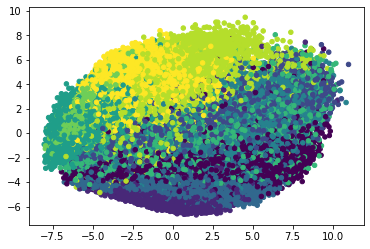

In [29]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, s=20, cmap='viridis');

In [30]:
# Алгоритм t-SNE

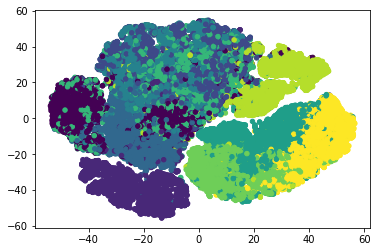

In [31]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, s=20, cmap='viridis');

Как мы видим, алгоритм t-SNE гораздо лучше разделил данные на кластеры, однако и работал гораздо дольше.

# Кластеризация алгоритмом KMeans

In [32]:
%%time
kmeans = KMeans(n_clusters=10, n_init = 100, random_state=17)
clusters = kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

CPU times: user 2min 29s, sys: 15.8 s, total: 2min 45s
Wall time: 1min 24s


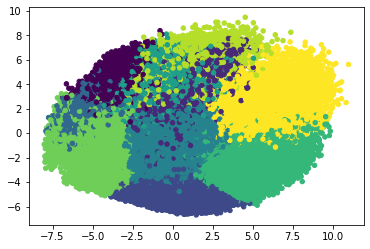

In [33]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20,  cmap='viridis');

In [34]:
# построим confusion matrix и посмотрим, когда KMeans ошибается

In [35]:
tab = pd.crosstab(y_train, cluster_labels, margins=True)
tab.index = class_names + ['all']
tab.columns = ['cluster' + str(i + 1) for i in range(10)] + ['all']

In [36]:
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,all
T-shirt/top,0,29,201,2,1582,0,3404,594,23,165,6000
Trouser,0,0,5414,0,129,0,235,156,3,63,6000
Pullover,0,27,9,1,1786,1,115,515,27,3519,6000
Dress,0,7,3207,0,524,0,1683,525,5,49,6000
Coat,0,30,155,0,1079,0,872,253,15,3596,6000
Sandal,482,13,1,1443,29,260,2,3766,4,0,6000
Shirt,0,17,62,6,2069,1,1055,775,62,1953,6000
Sneaker,778,0,0,4687,0,25,0,509,1,0,6000
Bag,67,2443,28,237,228,6,22,494,2207,268,6000
Ankle boot,2950,0,2,166,36,2669,2,170,4,1,6000
